In [49]:
import math
import csv
import matplotlib.pyplot as plt
import os 

# function that identifies coating position using the best approximation and the yttria distribution (most consistent). This is needed as the
# coating EDS distribution appears to shift in some linescans, due to the coating itself charging. We predict some drifting as a result, such
# that the linescan distribution doesn't match the image exactly

def coatingFinder(filename):
    fields = []
    rows = []

    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        fields = next(csvreader)
        for row in csvreader:
            rows.append(row)
    #print(fields)
    yttria_col = fields.index("Y LÎ±1 (counts)")
    #print(fields)

    yttria_count = []
    distance = []

    for row in rows:
        #print(row)
        yttria_count.append(float(row[yttria_col]))
        distance.append(float(row[0]))
    
    #rint(yttria_count)
    #print(distance)
    # identifies the position of peak yttria. The coating will definitely be approximately centred around this point. 
    max_yttria = max(yttria_count)    
    peak_position = yttria_count.index(max_yttria)
    
    # generates a list of all possible 2um length regions in the linescan
    line_spacing = 0.2
    coating_thickness = 1.98
    div = (coating_thickness/float(line_spacing))+1
    trial_positions = []
    for i in range(int(len(distance)-10)):
        trial_position = []
        for j in range(int(div)):
            trial_position.append(yttria_count[i+j])
        trial_positions.append(trial_position)

    suitable_trials = []
    for k in range(len(trial_positions)):
        if max_yttria in trial_positions[k]:
            suitable_trials.append(trial_positions[k])
        else:
            suitable_trials = suitable_trials
    #print(suitable_trials)
    # finds the subtract of the two end points. Ideally, this is minimised and most linescans will not have yttria build up obscuring results 
    end_point_values = []
    for l in range(len(suitable_trials)):
        end_val = suitable_trials[l][0] - suitable_trials[l][-1]
        end_val = end_val*end_val
        end_val = math.sqrt(end_val)
        end_point_values.append(end_val)

    #print(end_point_values)

    best_position = end_point_values.index(min(end_point_values))

    yttria_dis = suitable_trials[best_position]
    distance_finder = trial_positions.index(suitable_trials[best_position])   
    coating_edge = trial_positions[distance_finder][0]
    coating_start = distance[yttria_count.index(coating_edge)]
    coating_position = distance.index(coating_start)
    #print(coating_position)
    #print(coating_start)
    
    return coating_position

os.chdir('c:\\Users\\lp3917\\python')
os.chdir('Y0Ti')
#line = 'line10.csv'
#coatingFinder(line)



In [50]:
import os

os.getcwd()


'c:\\Users\\lp3917\\python\\Y0Ti'

In [51]:
# function that extracts each element into a list in a specified order [Y, Fe, Cr, Ti, C, O] starting from the coating edge only 

def tableReader(line, coat_edge):
    fields = []
    rows = []
    with open(line, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        fields = next(csvreader)
        for row in csvreader:
            rows.append(row)
    #print(fields)
    
    Y_P = fields.index('Y LÎ±1 (counts)')
    Fe_P = fields.index('Fe KÎ±1 (counts)')
    Cr_P = fields.index('Cr KÎ±1 (counts)')
    Ti_P = fields.index('Ti KÎ±1 (counts)')
    C_P = fields.index('C KÎ±1_2 (counts)')
    O_P = fields.index('O KÎ±1 (counts)')
    Distance_P = fields.index('ï»¿Distance (Âµm)')

    Y = []
    Fe = []
    Cr =[]
    Ti = []
    C = []
    O = []
    Distance = []

    f = 0
    line_spacing = 0.2
    for row in rows[coat_edge:]:

        Y.append(row[Y_P])
        Fe.append(row[Fe_P])
        Cr.append(row[Cr_P])
        Ti.append(row[Ti_P])
        C.append(row[C_P])
        O.append(row[O_P])
        Distance.append(f * line_spacing)
        f = f+1
    

    elements = []
    elements.append(Distance)
    elements.append(Y)
    elements.append(Fe)
    elements.append(Cr)
    elements.append(Ti)
    elements.append(C)
    elements.append(O)
    

    return elements 


In [52]:
#function that averages each elemental cps for each line in the data set for each point along the linescan of the coating
def averageDis(set):
    averages = []
    line_lengths = []

    for line in set:
        line_lengths.append(len(line[0]))    

    min_length = min(line_lengths)


    for l in range(1,7,1):
        av = []
        for i in range(min_length):
            b = []
            for list in set:
                b.append(float(list[l][i]))
            average_for_point = sum(b) / len(b) 
            av.append(average_for_point)  
            
        averages.append(av)

    return averages



In [53]:

def plotDistribution(YxTi, YxTiheat, x):
    profiles = averageDis(YxTi)
    profiles2 = averageDis(YxTiheat)
    distance = []
    tidistance = []
    ti2distance = []
    for i in range(len(profiles[1])):
        distance.append(i*0.2)
        tidistance.append(i*0.2)

    for i in range(len(profiles2[1])):
        ti2distance.append(i*0.2)

    

    ti = profiles[3]
    ti2 = [x/max(profiles2[3]) for x in profiles2[3]]


    colour = ['orange', 'pink', 'lightblue', 'darkblue', 'purple', 'green']
    fig, (ax1,ax2) = plt.subplots(2, sharex=True)
    plt.subplots_adjust(hspace = 0)
    #plot Y and Fe distributions on one y-axis
    for s in range(2):
        y = profiles[s]
        ax1.plot(distance,y,colour[s])
    #plot trace elements on second y-axis  
    #ax2 = ax1.twinx() 
    for s in range(2,6,1):
        y = profiles[s]
        ax2.plot(distance,y,colour[s])


    #INPUT AVERAGE COATING THICKNESS DETAILS HERE
    og_thickness= 1.98
    heated_thickness = 1.81

    coating_edge = [og_thickness, og_thickness]
    coating_edge2 = [0, 50000]
    ax1.plot(coating_edge, coating_edge2, 'black', linestyle = 'dashed')  
    ax2.plot(coating_edge, coating_edge2, 'black', linestyle = 'dashed')   
    #fig.text(0,4000,'Coating thickness ~ ' + str(og_thickness) + 'um')
    ax1.set_title('Elemental distribution across Y%sTi' % x)
    ax2.set_xlabel('Distance from edge (um)')
    ax1.set_ylabel('Counts Per Second')
    ax2.set_ylabel('Counts Per Second')
    ax1.legend(['Y', 'Fe', 'Coating edge'], loc='upper right')
    ax2.legend(['Cr', 'Ti', 'C', 'O', 'Coating edge'],loc = 'upper right')
    max_y1 = (round(max(profiles[0])/1000)+0.5)*1000
    max_y2 = (round(max(profiles[5])/100)+1)*100
    print(max_y1)
    ax1.set_ylim(0,max_y1)
    ax2.set_ylim(0,max_y2)
    fig.set_size_inches(15,8)
    l = plt.figure()

    plt.plot(tidistance, ti)
    plt.plot(coating_edge, coating_edge2, 'black', linestyle = 'dashed')
    plt.text(0,200,'Coating thickness ~ ' + str(og_thickness))
    plt.ylim(0,max(profiles[3])+100)
    plt.title('Ti distribution across coating')
    plt.xlabel('Distance from coating edge (um)')
    plt.ylabel('cps')
    lm = plt.figure()

    #normalised
    ti = [x/max(profiles[3]) for x in profiles[3]]
    ti2 = [x/max(profiles2[3]) for x in profiles2[3]]
    
    ti2distance = [x+(og_thickness - heated_thickness) for x in ti2distance]
    #plt.plot(tidistance, ti, color = 'green')
    #plt.plot(ti2distance, ti2, color = 'lime')
    #plt.plot(coating_edge, coating_edge2, 'black', linestyle = 'dashed' )
    
    #plt.ylim(0,1.2)
    #plt.ylabel('Rel. intensity')
    #plt.xlabel('Distance from the original coating edge, um')
    #plt.title('Comparison of Ti distribution for Y%sTi'%x)
    #plt.legend(['As received', 'Heat treated', 'Coating-substrate interface'])
    #h = plt.figure()\
    
    #INPUT THE ELEMENT OF INTEREST HERE: 0 - Y, 1 - Fe, 2 - Cr, 3 - Ti, 4 - C, 5 - O
    element2compare = 2
    elements = ['Y','Fe','Cr','Ti','C','O']
    
    xerr=[0.2]
    xerr2=[0.2]
    
    ytt = [x/max(profiles[element2compare]) for x in profiles[element2compare]]
    ytt2 = [x/max(profiles2[element2compare]) for x in profiles2[element2compare]]
 
    #plt.errorbar(tidistance, ytt, xerr = xerr, color = 'green', marker = '*', ecolor='red', elinewidth = 0.7, capsize=1)
    #plt.errorbar(ti2distance, ytt2, xerr = xerr2, color = 'lime', ecolor='red', elinewidth = 0.7, capsize=1)
    plt.plot(tidistance, ytt, color = 'green', marker ='s')
    plt.plot(ti2distance, ytt2, color = 'lime', marker ='s')
    plt.plot(coating_edge, coating_edge2, 'black', linestyle = 'dashed' )
    
    plt.ylim(0,1.2)
    plt.ylabel('Rel. intensity')
    plt.xlabel('Distance from the original coating edge, um')
    plt.title('Comparison of ' + elements[element2compare] + ' distribution for Y%sTi' %x)
    plt.legend(['As received', 'Heat treated', 'Coating-substrate interface'])
    pj = plt.figure()


        


3500.0
11500.0
7500.0


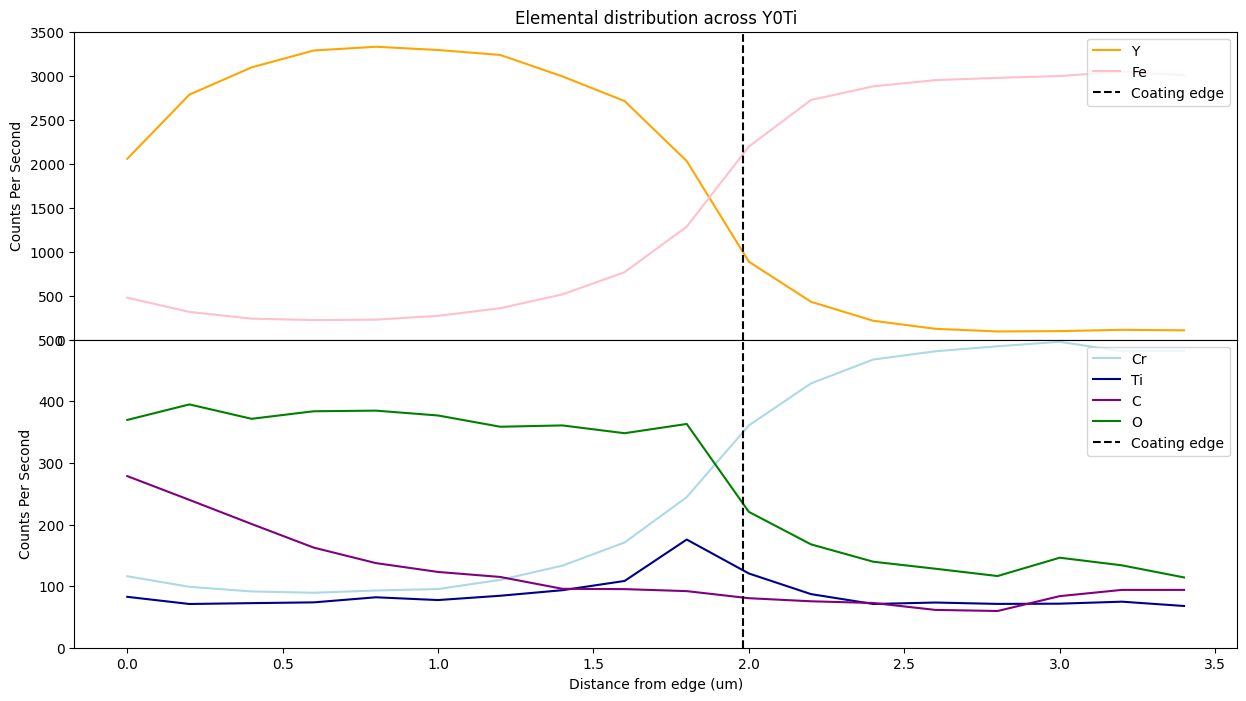

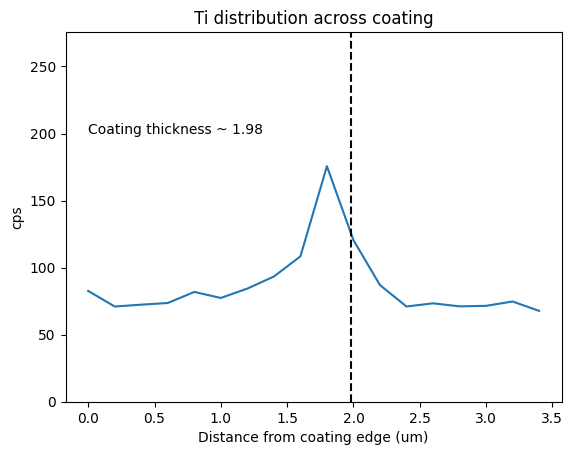

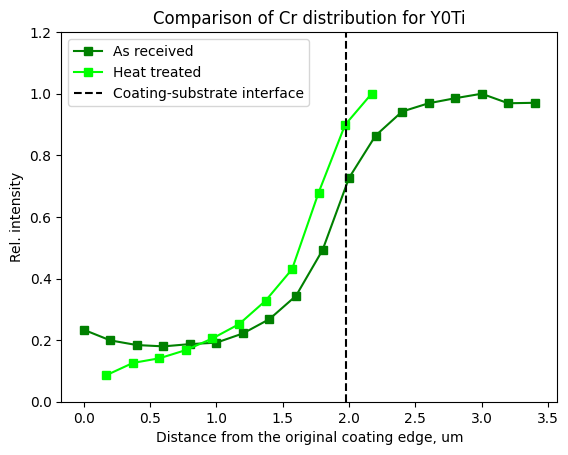

<Figure size 640x480 with 0 Axes>

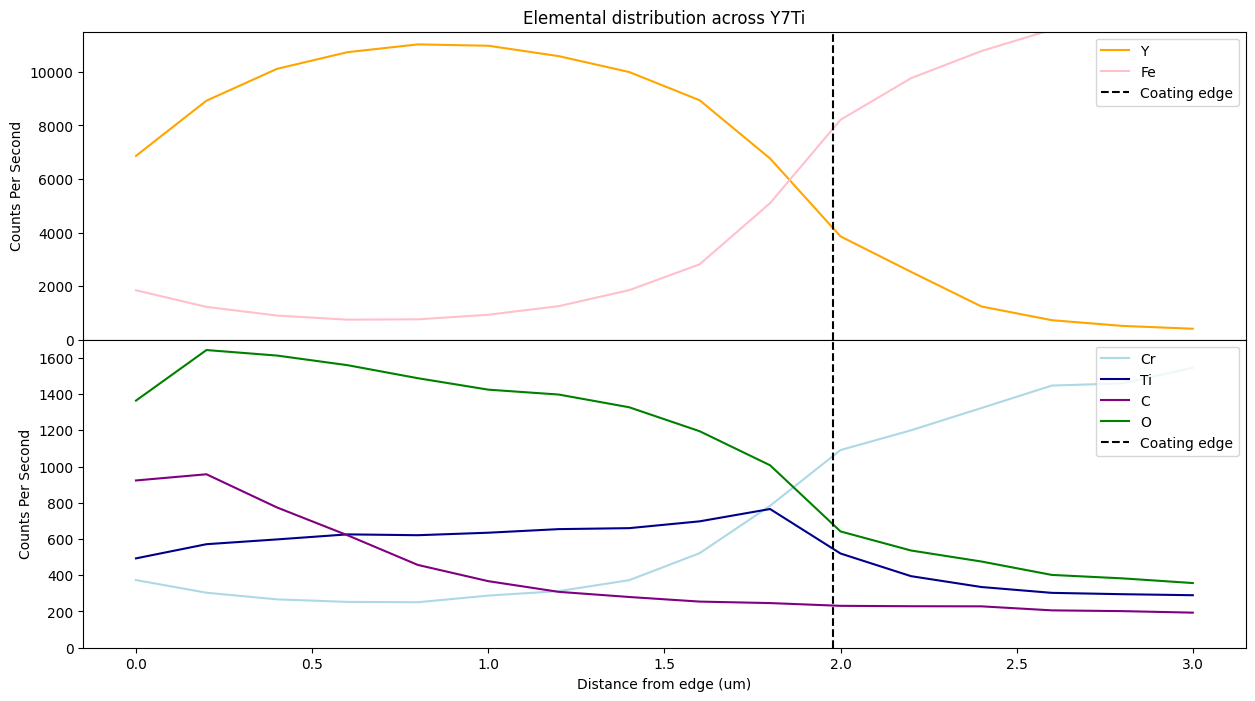

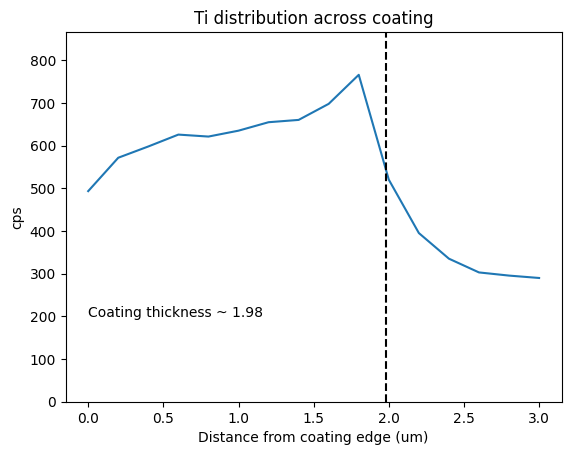

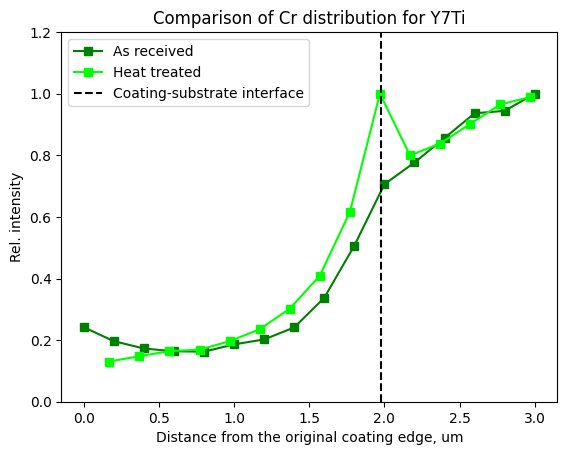

<Figure size 640x480 with 0 Axes>

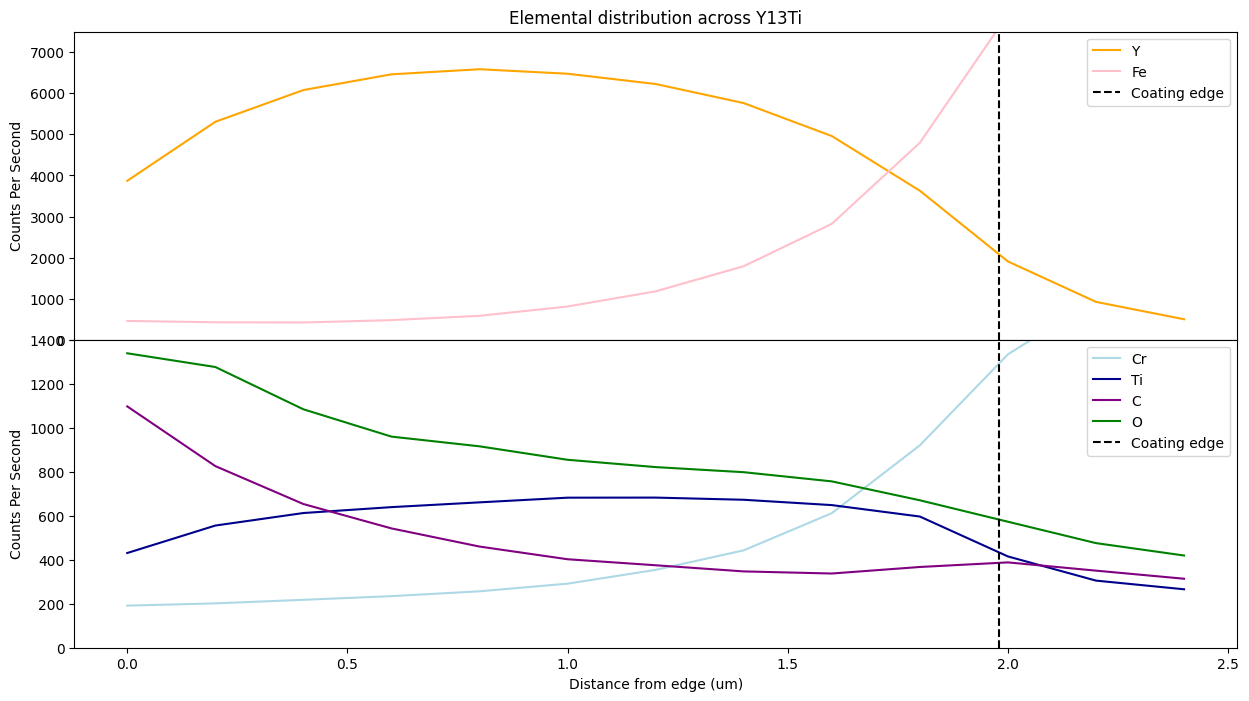

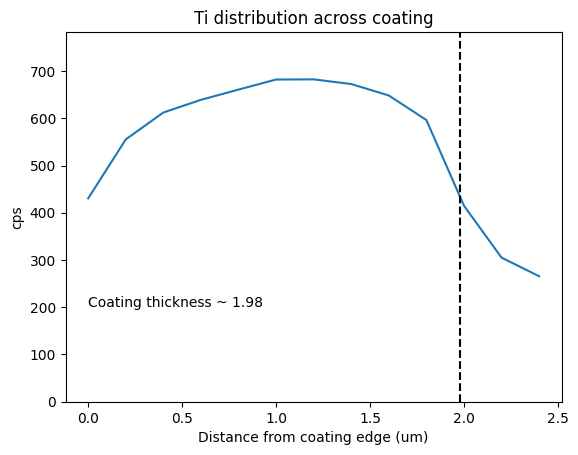

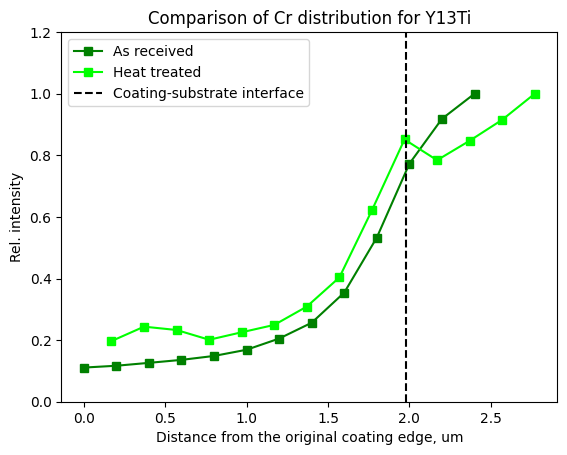

<Figure size 640x480 with 0 Axes>

In [54]:
os.chdir('c:\\Users\\lp3917\\python')
os.chdir('Y0Ti')
lines = os.listdir()

setY0Ti = []
for line in lines:
    pos = coatingFinder(line)
    setY0Ti.append(tableReader(line,pos))

os.chdir('c:\\Users\\lp3917\\python')
os.chdir('Y0Ti heat treated')
lines = os.listdir()

setY0Tiheat = []
for line in lines:
    pos = coatingFinder(line)
    setY0Tiheat.append(tableReader(line,pos))

plotDistribution(setY0Ti, setY0Tiheat, 0)

os.chdir('c:\\Users\\lp3917\\python')
os.chdir('Y7Ti')
lines = os.listdir()

setY7Ti = []
for line in lines:
    pos = coatingFinder(line)
    setY7Ti.append(tableReader(line,pos))

os.chdir('c:\\Users\\lp3917\\python')
os.chdir('Y7Ti heat treated')
lines = os.listdir()

setY7Tiheat = []
for line in lines:
    pos = coatingFinder(line)
    setY7Tiheat.append(tableReader(line,pos))

plotDistribution(setY7Ti, setY7Tiheat, 7)

os.chdir('c:\\Users\\lp3917\\python')
os.chdir('Y13Ti')
lines = os.listdir()

setY13Ti = []
for line in lines:
    pos = coatingFinder(line)
    setY13Ti.append(tableReader(line,pos))

os.chdir('c:\\Users\\lp3917\\python')
os.chdir('Y13Ti heat treated')
lines = os.listdir()

setY13Tiheat = []
for line in lines:
    pos = coatingFinder(line)
    setY13Tiheat.append(tableReader(line,pos))

plotDistribution(setY13Ti, setY13Tiheat, 13)




#######################################################################################################################
